## Library imports

In [1]:
#stardard python data munching modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#text preprocessing modules
import re
import nltk
import spacy
import string
import gensim
import textblob
import textstat
import wordcloud
from spacy import displacy
from nltk.util import ngrams
from  collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

#sklearn  modules
from sklearn.feature_extraction.text import CountVectorizer
sns.set(palette='pastel')

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Loading datasets

In [3]:
train_tweets = pd.read_csv('climate-change-belief-analysis/train.csv')
test_tweets = pd.read_csv('climate-change-belief-analysis/test.csv')

## Initial Assigments

In [4]:
SEED = 42
mentions = []
hashtags = []
document_tweets = []
nlp = spacy.load('en_core_web_sm')

### Converting each tweet into a Spacy Document

In [5]:
%%time
_ = train_tweets['message'].apply(lambda tweet: document_tweets.append(nlp(tweet)))

Wall time: 4min 14s


In [6]:
news_index = train_tweets[train_tweets['sentiment'] == 2].index.tolist()
neutral_index = train_tweets[train_tweets['sentiment'] == 0].index.tolist()
positive_index = train_tweets[train_tweets['sentiment'] == 1].index.tolist()
negative_index = train_tweets[train_tweets['sentiment'] == -1].index.tolist()

## Initial Data Preprocessing

In [7]:
def get_tweet_parts(tweet):
    tweet_list = []
    hashtag_list = []
    mention_list = []
    for word in tweet.split():
        if word.startswith('@') or word.startswith('RT'):
            mention_list.append(word)
        elif word.startswith("#"):
                hashtag_list.append(word)
        else:
            tweet_list.append(word)
    mentions.extend(mention_list)
    hashtags.extend(hashtag_list)
    return ' '.join(tweet_list)

In [8]:
train_tweets['message'] = train_tweets['message'].apply(get_tweet_parts)

## Exploratory Data Analysis

### Character frequency analysis

[Text(0, 0.5, 'Number of characters per tweet'),
 Text(0.5, 0, 'Tweet Sentiment')]

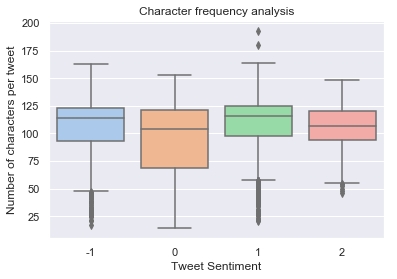

In [9]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['message'].str.len(), data=train_tweets)
ax.set_title('Character frequency analysis')
ax.set(xlabel='Tweet Sentiment', ylabel="Number of characters per tweet")

##### The number of characters for the news class of tweets is lower in general than the rest of the other classes, with values ranging from 60 to 150 characters per tweet. This is to be expected from news tweets, which are headlines,  would be shorter. The spread for the positive an negative tweets is similar with the positive tweets having a slightly shorter range than the negative tweets. No outliers exists for the neurtral tweets, few for the news class and roughly equal number of outliers for the negative and positive tweets.

### Word frequency analysis

[Text(0, 0.5, 'Number of words per tweet'), Text(0.5, 0, 'Tweet Sentiment')]

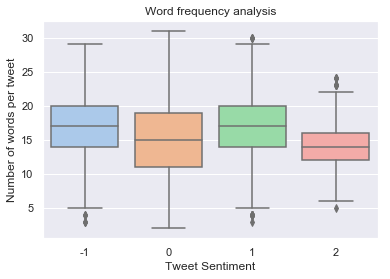

In [10]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['message'].str.split().map(lambda x: len(x)), data=train_tweets)
ax.set_title('Word frequency analysis')
ax.set(ylabel="Number of words per tweet", xlabel='Tweet Sentiment')

##### The number of words used on for news tweets tend to be lower indicative of news headlines that to be shorter in general, whilst the other classes being more opinionated tend to use more on avarage. also the spread of the number of words for the news tweets is less than the other classes. The negative and positive classes have a range starting at 5 going all the way to around about 30 to 33 words respectively. very few outliers in all the classes, with the neatral containing no outliers.

### Syllable count analysis

In [76]:
train_tweets['syllable_count'] = train_tweets['message'].apply(lambda tweet: textstat.syllable_count(tweet))

[Text(0, 0.5, 'Syllable count'), Text(0.5, 0, 'Tweet Sentiment')]

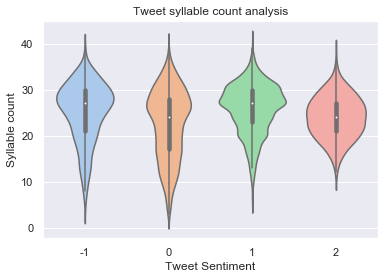

In [79]:
ax = sns.violinplot(x=train_tweets['sentiment'], y=train_tweets['syllable_count'], data=train_tweets)
ax.set_title('Tweet syllable count analysis')
ax.set(ylabel="Syllable count", xlabel='Tweet Sentiment')

The number of syllables for the negative and neutral tweets have greater range(spread) than the news class of tweets and slightly longer range than the positve tweets. News tweets range from 9 to 41 syllables, whilst the other 3 classes of tweets have minimum values closer to 1.

### Stopword analysis

In [12]:
def plot_top_stopwords_barchart(text):
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word.lower() in STOP_WORDS:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:] 
    x,y=zip(*top)
    return x,y
#     plt.bar(x,y)

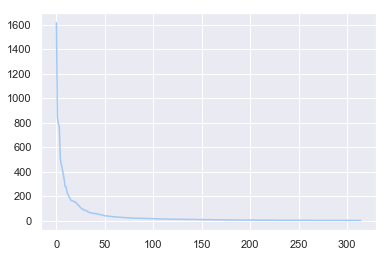

In [13]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 2]['message'])[1])

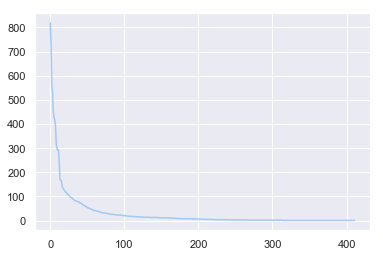

In [14]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 0]['message'])[1])

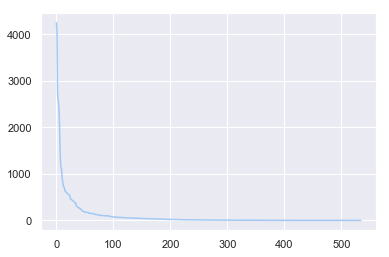

In [15]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == 1]['message'])[1])

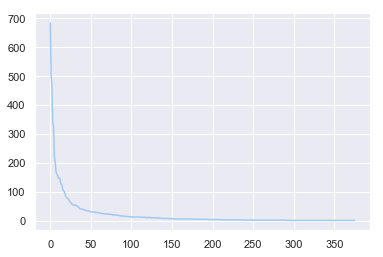

In [16]:
ax = plt.plot(plot_top_stopwords_barchart(train_tweets[train_tweets['sentiment'] == -1]['message'])[1])

#### From the visuals above we see that around about 30 stopwords are used most frequently in all the classes of tweets, and the rest of the stopwords occur infrequently the tweets.

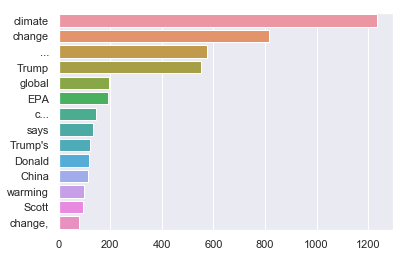

In [17]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 2]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

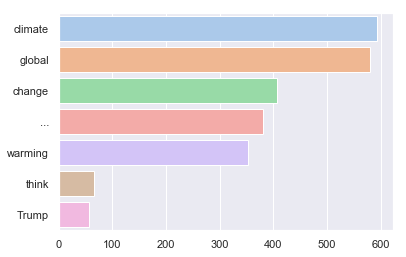

In [18]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 0]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

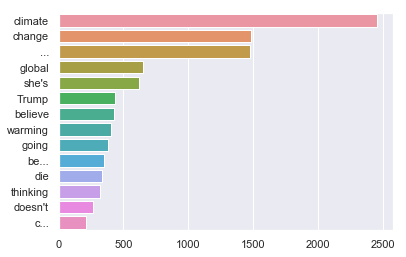

In [19]:
counter = Counter(train_tweets[train_tweets['sentiment'] == 1]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

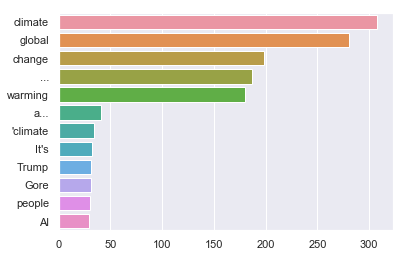

In [20]:
counter = Counter(train_tweets[train_tweets['sentiment'] == -1]['message'].to_string().split())
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word.lower() not in STOP_WORDS):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Ngram exploration

In [21]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

#### Bi-gram analysis

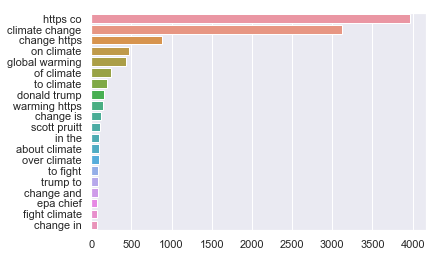

In [22]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 2]['message'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

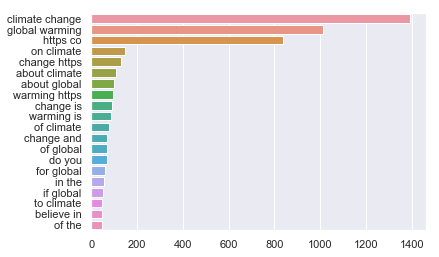

In [23]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 0]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

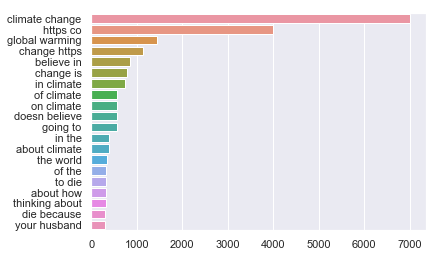

In [24]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 1]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

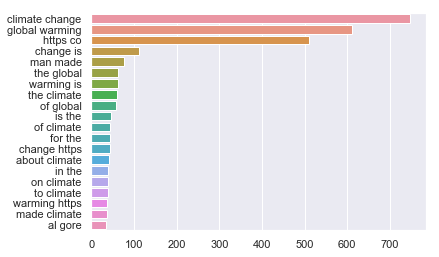

In [25]:
top_n_bigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == -1]['message'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

#### Tri-gram analysis

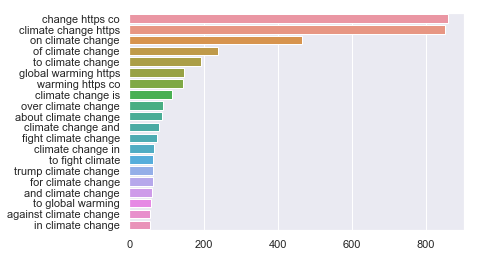

In [26]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 2]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

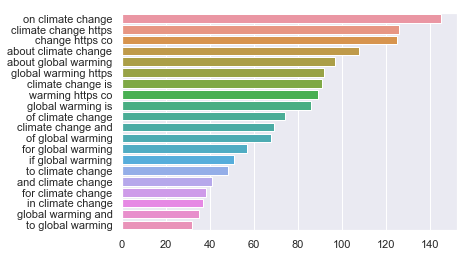

In [27]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 0]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

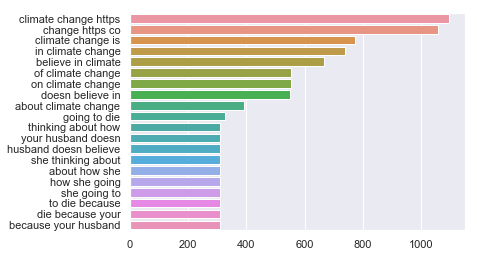

In [28]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == 1]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

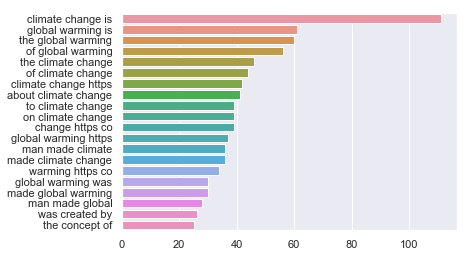

In [29]:
top_n_trigrams=get_top_ngram(train_tweets[train_tweets['sentiment'] == -1]['message'],3)[:20]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

### Wordclouds analysis

In [30]:
def preprocess_tweets(df):
    corpus=[]
    stem = nltk.PorterStemmer()
    lem = nltk.WordNetLemmatizer()
    for tweets in df['message']:
        words = [word for word in nltk.word_tokenize(tweets) if (word.lower() not in STOP_WORDS)]
        
        words=[lem.lemmatize(word) for word in words if len(word)>2]
        
        corpus.append(words)
    return corpus



In [31]:
news_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 2])
neutral_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 0])
positive_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == 1])
negative_corpus = preprocess_tweets(train_tweets[train_tweets['sentiment'] == -1])

In [32]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

#### News wordcloud

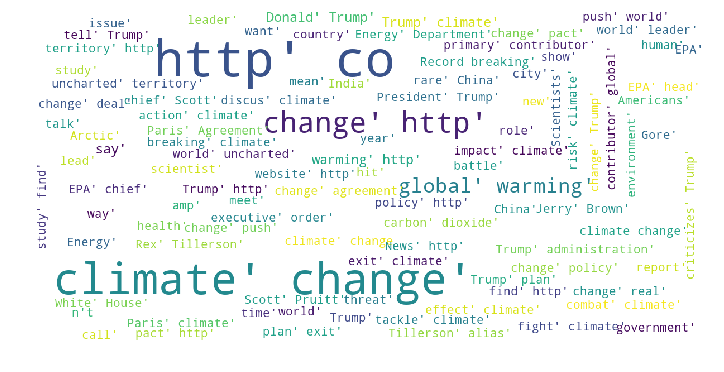

In [33]:
show_wordcloud(news_corpus)

#### Neutral sentiment wordcloud

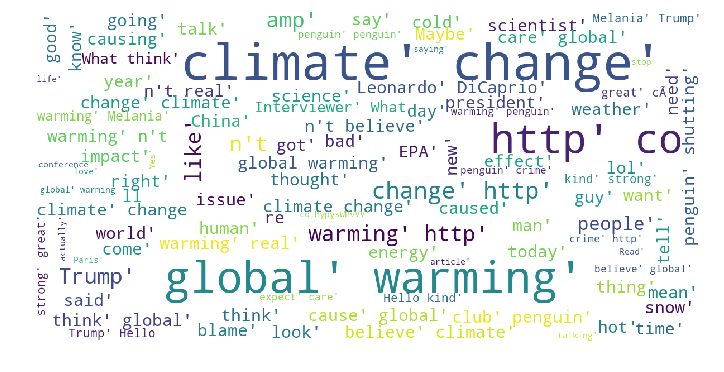

In [34]:
show_wordcloud(neutral_corpus)

#### Positive sentiment wordcloud

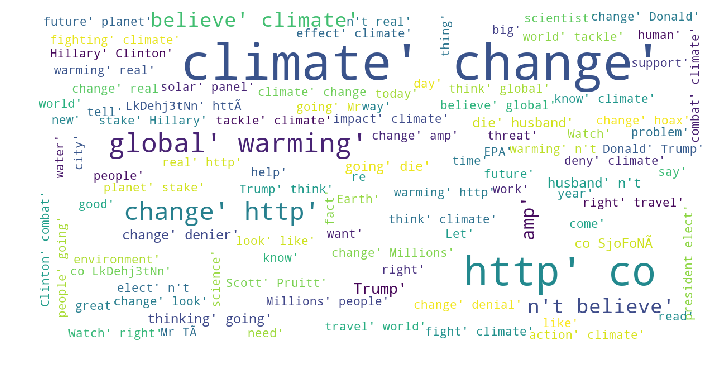

In [35]:
show_wordcloud(positive_corpus)

#### Neutral sentiment wordcloud

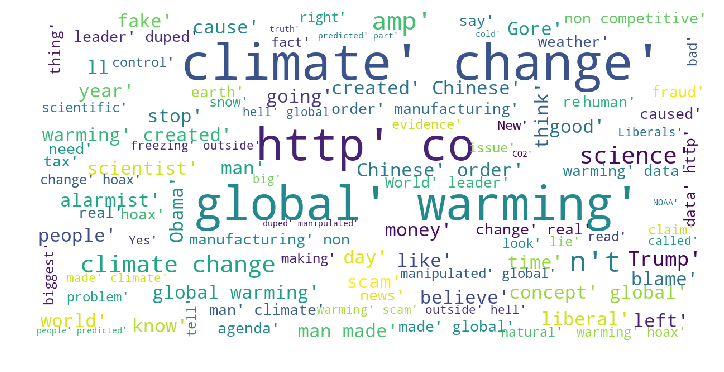

In [36]:
show_wordcloud(negative_corpus)

In [37]:
def get_ners(index_list, tweet_class):
    
    named_entities = Counter()
    for index in index_list:
        for ent in document_tweets[index].ents:
            named_entities[ent.label_] += 1
    entity_count, entities = map(list, zip(*named_entities.most_common()))
    return entity_count, entities
#     ax = sns.barplot(x=entities, y=entity_count)
#     ax.set_title(f'{tweet_class}')
#     ax.set(xlabel='Entity count', ylabel='Named entities')

In [ ]:
get_ners(news_index, 'News tweets')

In [ ]:
get_ners(neutral_index, 'Neutral tweets')

In [ ]:
get_ners(positive_index, 'Positive tweets')

In [41]:
get_ners(negative_index, 'Negative tweets')

(['ORG',
  'PERSON',
  'GPE',
  'DATE',
  'NORP',
  'CARDINAL',
  'MONEY',
  'LOC',
  'ORDINAL',
  'WORK_OF_ART',
  'PERCENT',
  'QUANTITY',
  'FAC',
  'PRODUCT',
  'TIME',
  'EVENT',
  'LAW'],
 [756, 481, 311, 177, 141, 129, 103, 31, 16, 15, 15, 14, 13, 12, 11, 8, 1])

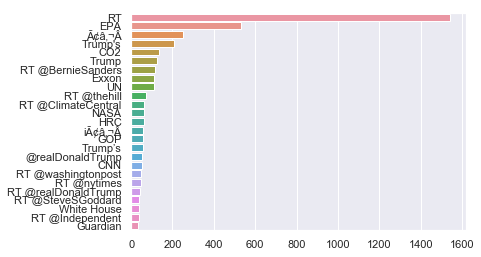

In [80]:
def get_entities(doc,ent="ORG"):
    return [X.text for X in doc.ents if X.label_ == ent]
gpe = []
for doc in document_tweets:
    gpe.append(get_entities(doc))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)


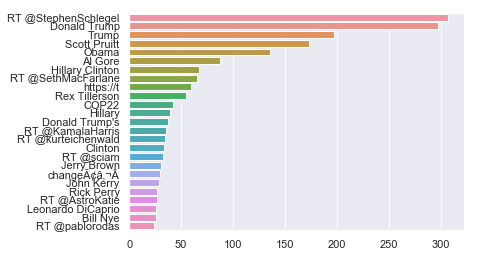

In [82]:
def get_entities(doc,ent="PERSON"):
    return [X.text for X in doc.ents if X.label_ == ent]
gpe = []
for doc in document_tweets:
    gpe.append(get_entities(doc))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(25)))
sns.barplot(y,x)

### Parts of speech analysis

#### This involves at looking at the different parts speech that occur most frequently in each class of tweets

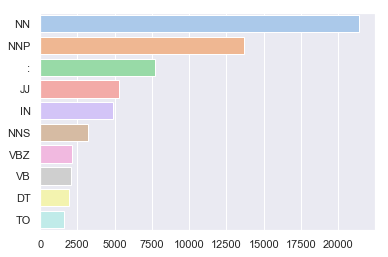

In [44]:
def pos(text):
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 2].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

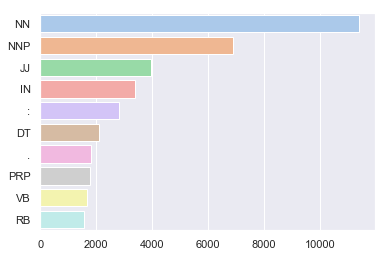

In [45]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 0].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

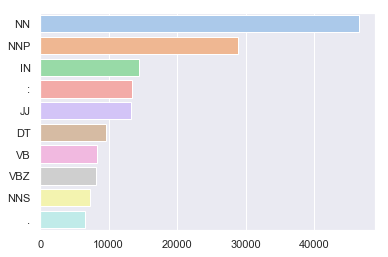

In [46]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == 1].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

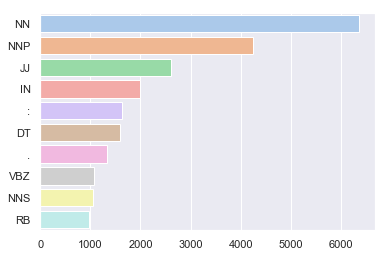

In [47]:
tags = []
news_indices = train_tweets[train_tweets['sentiment'] == -1].index.tolist()
for ni in news_indices:
    tags.append(pos(document_tweets[ni].text))
tags = [x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(10))))
sns.barplot(x=y,y=x)

#### From the above visuals we see that nouns and  proper nouns in the singualr form and along with adjectives occur most frequently in all the classes of tweets. Verbs in the base form along aside verbs that refer to the third person in sigular form also feature in the top 10 parts of speech that occur in the tweets.

In [48]:
# def get_adjs(text):
#     adj=[]
#     pos=nltk.pos_tag(nltk.word_tokenize(text))
#     for word,tag in pos:
#         if tag=='NN':
#             adj.append(word)
#     return adj
# words =[]
# news_indices = train_tweets[train_tweets['sentiment'] == -1].index.tolist()
# for ni in news_indices:
#     tags.append(get_adjs(document_tweets[ni].text))
# words=[x for l in words for x in l]
# counter=Counter(words)
# words
# x,y=list(map(list,zip(*counter.most_common(10))))
# sns.barplot(x=y,y=x)

In [49]:
def get_pos_tags(index_list, pos='ADJ'):
    pos_tags = []
    for index in index_list:
        for token in document_tweets[index]:
            if token.pos_ == pos:
                pos_tags.append(token.text)
    return list(set(pos_tags))

news_adjs = get_pos_tags(news_index)
neutral_adjs = get_pos_tags(neutral_index)
negative_adjs = get_pos_tags(negative_index)
positive_adjs = get_pos_tags(positive_index)

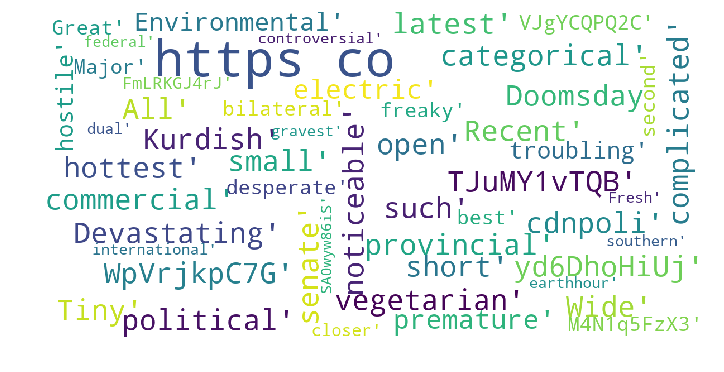

In [50]:
show_wordcloud(list(set(news_adjs))[0:50])

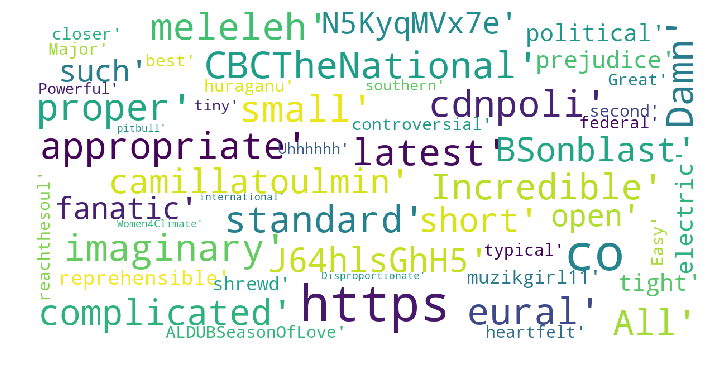

In [51]:
show_wordcloud(list(set(neutral_adjs))[0:50])

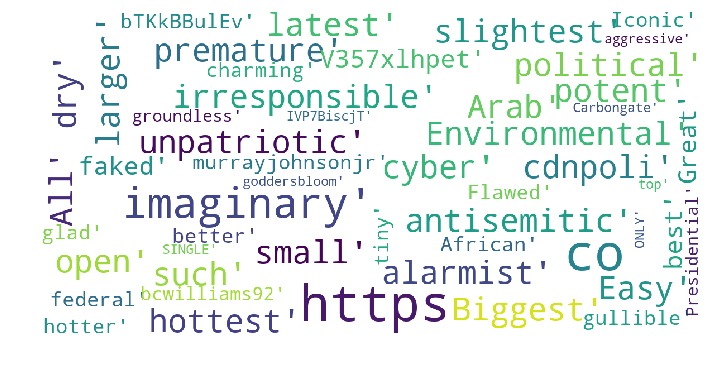

In [52]:
show_wordcloud(list(set(negative_adjs))[0:50])

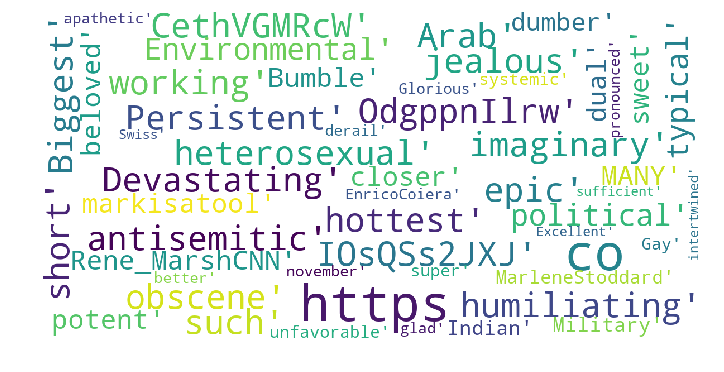

In [53]:
show_wordcloud(list(set(positive_adjs))[0:50])

### Sentiment analysis

This is an investigation to see if there is an agreement in the sentiment labels of the tweets and scores obtained using the sentiment scores obtained from using different packages for sentiment analysis. If there agreemnt between these scores than they could be used as potential features.

In [55]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [57]:
neutral_scores = []
negative_scores = []
positive_scores = []
compound_scores = []
for index, value in train_tweets['message'].apply(sentiment_analyzer_scores).items():
    neutral_scores.append(value['neu'])
    negative_scores.append(value['neg'])
    positive_scores.append(value['pos'])
    compound_scores.append(value['compound'])

In [59]:
polarity = []
subjectivity = []

for index, value in train_tweets['message'].apply(lambda tweet: textblob.TextBlob(tweet).sentiment).items():
    polarity.append(value.polarity)
    subjectivity.append(value.subjectivity)

In [60]:
train_tweets['polarity'] = polarity
train_tweets['subjectivity'] = subjectivity
train_tweets['neutral_score'] = neutral_scores
train_tweets['negative_score'] = negative_scores
train_tweets['positive_score'] = positive_scores
train_tweets['compound_score'] = compound_scores

In [61]:
train_tweets.head()

,sentiment,message,tweetid,polarity,subjectivity,neutral_score,negative_score,positive_score,compound_score
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,0.083333,0.166667,0.900,0.000,0.100,0.2244
1,1,It's not like we lack evidence of anthropogeni...,126103,0.000000,0.000000,0.552,0.167,0.281,0.1159
2,2,Researchers say we have three years to act on ...,698562,-0.300000,0.600000,1.000,0.000,0.000,0.0000
3,1,WIRED : 2016 was a pivotal year in the war on ...,573736,0.500000,0.800000,0.769,0.231,0.000,-0.5994
4,1,"It's 2016, and a racist, sexist, climate chang...",466954,0.000000,0.000000,0.670,0.330,0.000,-0.7506


[Text(0, 0.5, 'Neutral score'), Text(0.5, 0, 'Tweet Sentiment')]

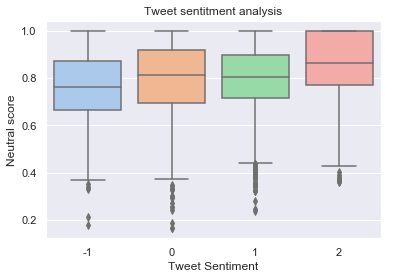

In [62]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['neutral_score'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Neutral score", xlabel='Tweet Sentiment')

The neutral score is a probalbe measure of how neutral the individual tokens are in each tweet. The tokens from the different classes tend have neuatrality scores that are in the same range, with higher scores for the news tweets, the negative tweets have slightly lower scores. But all in all there is not a lot of variantion in the spread to read anything meaningful into the resluts.

[Text(0, 0.5, 'Neutral score'), Text(0.5, 0, 'Tweet Sentiment')]

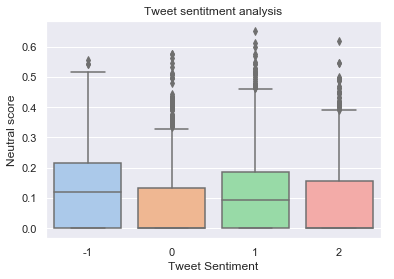

In [63]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['negative_score'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Negative score", xlabel='Tweet Sentiment')

The negative score is a probable measure of how negative the individual tokens of a tweets. The results again show no variation among the different classes and as such no meaningful insights are gained from this measure.

[Text(0, 0.5, 'Neutral score'), Text(0.5, 0, 'Tweet Sentiment')]

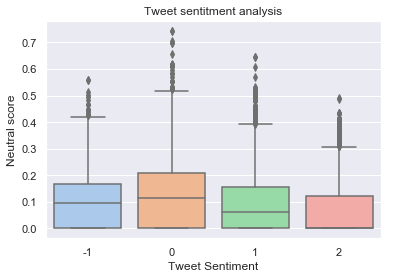

In [64]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['positive_score'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Positive score", xlabel='Tweet Sentiment')

Likewise the positive score is a probable measure of the positivity of the individual tokens in each tweet. No variation is to be found in this measure either. 

[Text(0, 0.5, 'Compound score'), Text(0.5, 0, 'Tweet Sentiment')]

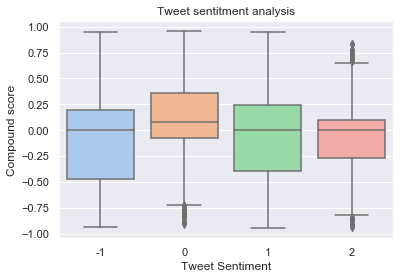

In [65]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['compound_score'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Compound score", xlabel='Tweet Sentiment')

The compound score is a probabl measure of the sentiment of a tweet, based on the aggregation of the three above measures. News tweets have 25th to 75th pecentile scores ranging between -0.25 and 0.25 which are in the neutral range. Positive have lots of scores in the negative range, thus showing no agreemnt with the positive sentiment lables attributed to them. The 0 to 50th pecentile scores for the negative tweets are in the nengative range. Nuetral tweets scores that are mostly positive. in conclusion this compound scores for the tweets are not reliable.

[Text(0, 0.5, 'Polarity score'), Text(0.5, 0, 'Tweet Sentiment')]

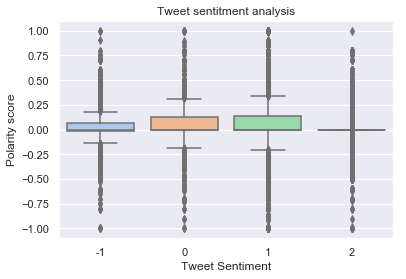

In [66]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['polarity'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Polarity score", xlabel='Tweet Sentiment')

The polarity measure is a measure of sentiment. Scores of 1 and -1 represent strongly positive and negative sentiments respectively. the distribution of the scoresfor each class suggests similar sentiment and thus is also not a reliable measure that can be used as a potential feature in our models.

[Text(0, 0.5, 'Subjectivity score'), Text(0.5, 0, 'Tweet Sentiment')]

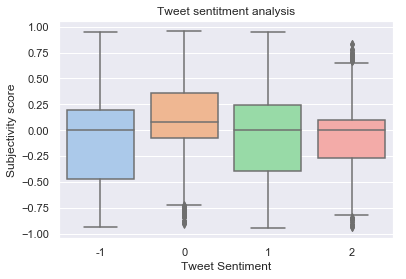

In [67]:
ax = sns.boxplot(x=train_tweets['sentiment'], y=train_tweets['compound_score'], data=train_tweets)
ax.set_title('Tweet sentitment analysis')
ax.set(ylabel="Subjectivity score", xlabel='Tweet Sentiment')

The subjectivity score is measure of subjective a tweet is. A a score of 0 indicates an objective tweet, whilst a score of 1 indicates an subjective tweet. The tweets have scores that indictae that they are objective, not stroingly so however. The neutral tweets with scores that reflect subjectivity, but again not strong so.

In closing none of the above measures can be reliably.

### Text complexity analysis

In [68]:
train_tweets['fre_score'] = train_tweets['message'].apply(lambda tweet: textstat.flesch_reading_ease(tweet))

C:\Users\wnexp\anaconda3\envs\nlp_course\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'FRE score'), Text(0.5, 0, 'Tweet Sentiment')]

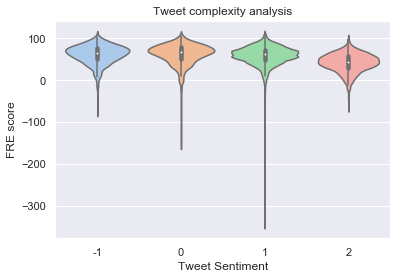

In [69]:
ax = sns.violinplot(x=train_tweets['sentiment'], y=train_tweets['fre_score'], data=train_tweets)
ax.set_title('Tweet complexity analysis')
ax.set(ylabel="FRE score", xlabel='Tweet Sentiment')

The Flesch reading-ease test assess the ease of readability in a document.  Higher scores indicate material that is easier to read; lower scores mark passages that are more difficult to read. The scores from all the classes range between 100 and 0 indicate tweets that range from being very easy to read and can be understood by an average 11-year-old student, whilst the those closer to a zero score are extremely difficult to read. Best understood by university graduates. The outliers represent tweets that are difficult to decipher, being more confusing than difficult to understand.